In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import  confusion_matrix, silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
import warnings


### Funciones

In [2]:
def creacion_listas(target,excepcion,nas):
    lista_columnas = diccionario[target]
    lista_columnas
    for item in lista_columnas:
        if item in nas:
            if item in excepcion:
                pass
            else:
                lista_columnas.remove(item)
    lista_columnas.append(target)
    return(lista_columnas.copy())

### Cargando datos y separandolos

In [3]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/defunciones/Defunciones.csv", header = "infer", delimiter = ",", encoding = "latin-1")

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,...,dredif,mredif,caudef,asist,ocur,cerdef,escodif,pnadif,predif,ciuodif
0,5,505,1,9,5,505,9.0,1,2,1,...,1,101,Y214,1,3,1,NaN,NaN,NaN,NaN
1,1,101,9,9,1,101,9.0,1,27,9,...,1,101,X919,4,3,1,NaN,NaN,NaN,NaN
2,22,2206,9,9,22,2206,9.0,2,23,8,...,1,101,X959,4,3,2,NaN,NaN,NaN,NaN
3,2,201,12,9,2,201,9.0,1,5,12,...,1,101,V899,4,3,1,NaN,NaN,NaN,NaN
4,1,101,5,9,1,101,9.0,2,7,5,...,1,101,X709,4,3,1,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

depreg          0
mupreg          0
mesreg          0
añoreg          0
depocu          0
mupocu          0
areag      168671
sexo            0
diaocu          0
mesocu          0
añoocu          0
edadif          0
perdif          0
puedif          0
ecidif          0
ocudif     565215
dnadif          0
mnadif          0
nacdif          0
dredif          0
mredif          0
caudef          0
asist           0
ocur            0
cerdef          0
escodif     71707
pnadif     216809
predif     216809
ciuodif    289466
dtype: int64

In [6]:
len(df)

854681

In [7]:
o=df.isnull()

mask=o.any(axis = 1)

In [8]:
muchos_nas = df.columns[df.isna().any()].tolist()

In [9]:
columnas = df.columns
columnas

Index(['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag',
       'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'puedif',
       'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif',
       'caudef', 'asist', 'ocur', 'cerdef', 'escodif', 'pnadif', 'predif',
       'ciuodif'],
      dtype='object')

In [10]:
df["añoreg"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [11]:
df["añoocu"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [12]:
x=np.array([[0],[1],[2],[3],[4]]*6).reshape(30)
y =np.array([[0],[1],[2],[3],[4],[5]]*5).reshape(30)
            


### Creando un nuevo data frame con menos datos

In [13]:
df2 =  df.sample(n = 400000, random_state = 666)
df3 =  df.sample(n = 100000, random_state = 666)
df2.dtypes

depreg       int64
mupreg       int64
mesreg       int64
añoreg       int64
depocu       int64
mupocu       int64
areag      float64
sexo         int64
diaocu       int64
mesocu       int64
añoocu       int64
edadif       int64
perdif       int64
puedif       int64
ecidif       int64
ocudif     float64
dnadif       int64
mnadif      object
nacdif       int64
dredif       int64
mredif       int64
caudef      object
asist        int64
ocur         int64
cerdef       int64
escodif    float64
pnadif     float64
predif     float64
ciuodif     object
dtype: object

In [14]:
len(df2)

400000

In [15]:
df2_numeric = df2.select_dtypes(include = np.number)

In [16]:
columnas_numericas  = df2_numeric.columns

In [17]:
#contador = 0
#fig, axs = plt.subplots(5,6, figsize=(30,30))
#for i in range(0,len(columnas)):
    #sns.barplot(ax = axs[x[i],y[i]],data =df2_numeric, x = columnas_numericas[i], hue =  "añoreg")
    #axs[x[i],y[i]].set_title(columnas[i], fontsize = "xx-large")



In [18]:
o = pd.DataFrame()

In [19]:
plt.ioff()

### Generando gráficas para explorar datos

In [ ]:

for i in range(0,len(columnas)):
    fig,axs = plt.subplots(figsize=(17.5,10))
    sns.barplot(ax = axs,
                data =df2, 
                x = columnas[i],
                y = "escodif", 
                hue = "escodif",
                estimator=lambda x: len(x) / len(df2) * 100)
    plt.tight_layout()
    axs.set_ylabel("Porcentaje", fontsize = "xx-large")
    axs.set_xlabel(columnas[i], fontsize = "xx-large")
    fig.suptitle(columnas[i], fontsize = "xx-large")
    fig.legend(fontsize = "xx-large")
    fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+"_hue=puedif.jpg", bbox_inches ='tight')
    plt.close(fig)

En este caso no usamos df2 si no, df2_encoder. Sin embargo este data frame se definió más abajo. Esto se hizo porque en  un prinipio se utilizó countplots que admitían variables tipo string, pero con barplot se tenía que cambiar esto. Sin embargo, al mover las celdas para que tuvieran mas coherencia el algoritmo empezó a generar muchos errores. Por lo que de se dejó de esta forma aunque perdiese coherencia el algoritmo. 

In [217]:
for i in range(0,len(columnas)):
    fig,ax1 = plt.subplots(figsize=(10,10))
    
    sns.barplot(ax = ax1,
                  data =df2_encoder, 
                  x = columnas[i],
                  y = columnas[i],
                  estimator=lambda x: len(x) / len(df2) * 100)
    fig.tight_layout()
    fig.suptitle(columnas[i], fontsize = "xx-large")
    axs.set_ylabel("Porcentaje (%)", fontsize = "xx-large")
    
    
   
    
    fig.savefig("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+".jpg", bbox_inches ='tight')
    plt.close(fig)
   

In [ ]:
mask_edades = df2["edadif"] < 110
fig = plt.figure()
sns.histplot(data = df2[mask_edades] , x = "edadif", discrete = True, kde = True )
plt.title("Histograma edadif")
fig.tight_layout()
fig.savefig("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+"Histpgrama_edadif.jpg", bbox_inches ='tight')
plt.show()
plt.close(fig)

In [218]:
for i in columnas:
    print("Columna: "+ i)
    print(df2[i].value_counts(sort = True))
    print("")
    print("Valores normalizados")
    print(df2[i].value_counts(sort = True, normalize = True))
    print("")
    print("**************")
    print("")

Columna: depreg
1     117682
16     24823
9      24306
12     23707
5      22625
13     22533
14     20031
10     15062
4      13914
22     12335
8      11627
6      10878
20     10314
17      9884
18      9459
7       8910
3       8327
11      8246
21      7933
19      7207
15      5971
2       4226
Name: depreg, dtype: int64

Valores normalizados
1     0.294205
16    0.062058
9     0.060765
12    0.059268
5     0.056563
13    0.056333
14    0.050077
10    0.037655
4     0.034785
22    0.030838
8     0.029067
6     0.027195
20    0.025785
17    0.024710
18    0.023647
7     0.022275
3     0.020817
11    0.020615
21    0.019832
19    0.018017
15    0.014927
2     0.010565
Name: depreg, dtype: float64

**************

Columna: mupreg
101     96070
901      8968
501      6581
1601     6456
1001     4511
        ...  
316        81
716        79
702        75
703        53
1333       19
Name: mupreg, Length: 340, dtype: int64

Valores normalizados
101     0.240175
901     0.022420
501    

### Empleando encoders para análisis

In [20]:
df2_encoder = df2.copy()

In [21]:
df2_encoder["ciuodif"]  = df2_encoder["ciuodif"].astype(str)
df2_encoder["mnadif"]  = df2_encoder["mnadif"].astype(str)

In [22]:
gle = LabelEncoder()

In [23]:
caudef_labels = gle.fit_transform(df2_encoder["caudef"])
caudef_mappin = {index: label for index, label in 
                  enumerate(gle.classes_)}

ciuodif_labels = gle.fit_transform(df2_encoder["ciuodif"])
ciuodif_mappin = {index: label for index, label in 
                  enumerate(gle.classes_)}

mnadif_labels = gle.fit_transform(df2_encoder["mnadif"])
mnadif_mappin = {index: label for index, label in 
                  enumerate(gle.classes_)}

In [24]:
df2_encoder["caudef"] = caudef_labels
df2_encoder["ciuodif"] = ciuodif_labels
df2_encoder["mnadif"] = mnadif_labels

In [25]:
df2_encoder.isna().sum()

depreg          0
mupreg          0
mesreg          0
añoreg          0
depocu          0
mupocu          0
areag       78983
sexo            0
diaocu          0
mesocu          0
añoocu          0
edadif          0
perdif          0
puedif          0
ecidif          0
ocudif     264602
dnadif          0
mnadif          0
nacdif          0
dredif          0
mredif          0
caudef          0
asist           0
ocur            0
cerdef          0
escodif     33543
pnadif     101406
predif     101406
ciuodif         0
dtype: int64

### Matriz de correlacion 

In [26]:
from dython.nominal import associations

ModuleNotFoundError: No module named 'dython'

In [ ]:
Lista_columnas = columnas.tolist()
Lista_columnas_nominales = Lista_columnas.copy()
Lista_columnas_nominales.remove("edadif")

In [ ]:
fig,axs = plt.subplots(figsize = (15,15))
diccionario_corr=associations(df,ax = axs, nominal_columns = Lista_columnas_nominales, plot = True, clustering = True,nan_replace_value = -666, theil_u = True)
fig.suptitle("Correlaciones", fontsize = "xx-large")
fig.tight_layout()
fig.savefig("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+"heatmap_clusterizado4.jpg", bbox_inches ='tight')
plt.close(fig)

In [29]:
corr=diccionario_corr['corr']

In [30]:
diccionario = {}

In [31]:
names = []
for i in columnas:
    for index,row in corr[i].items():
        if (index != i): 
            if (abs(row)>=0.1):
                names.append(index)
    diccionario[i] = names
    names = []
    

In [32]:
for key in diccionario:
    print(key+":")
    print(diccionario[key])
    print("")
    print("*****")

depreg:
['mupreg', 'depocu', 'mupocu', 'mredif', 'dredif', 'mnadif', 'dnadif']

*****
mupreg:
['depreg', 'depocu', 'mupocu', 'mredif', 'dredif', 'mnadif', 'dnadif', 'caudef']

*****
mesreg:
['mesocu']

*****
añoreg:
['añoocu', 'pnadif', 'escodif', 'nacdif', 'ocudif', 'ciuodif', 'puedif', 'predif', 'areag']

*****
depocu:
['depreg', 'mupreg', 'mupocu', 'mredif', 'dredif', 'mnadif', 'dnadif']

*****
mupocu:
['depreg', 'mupreg', 'depocu', 'mredif', 'dredif', 'mnadif', 'dnadif', 'caudef']

*****
areag:
['depreg', 'mupreg', 'depocu', 'mupocu', 'mredif', 'añoreg', 'añoocu', 'ciuodif', 'asist', 'ocur']

*****
sexo:
['ocudif', 'ciuodif']

*****
diaocu:
[]

*****
mesocu:
['mesreg']

*****
añoocu:
['añoreg', 'pnadif', 'escodif', 'nacdif', 'ocudif', 'ciuodif', 'puedif', 'predif', 'areag']

*****
edadif:
['mnadif', 'dnadif', 'pnadif', 'nacdif', 'ocudif', 'ciuodif', 'perdif', 'caudef', 'ecidif']

*****
perdif:
['mredif', 'dredif', 'mnadif', 'escodif', 'ocudif', 'ciuodif', 'puedif', 'edadif', 'caude

#### Aplicando agrupamiento

In [224]:
distortions = []
sombra = []
K = range(1,10)
df_cluster = df2_encoder.drop(muchos_nas, axis = 1)
df_cluster=pd.get_dummies(df_cluster ,drop_first = True)

In [225]:
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

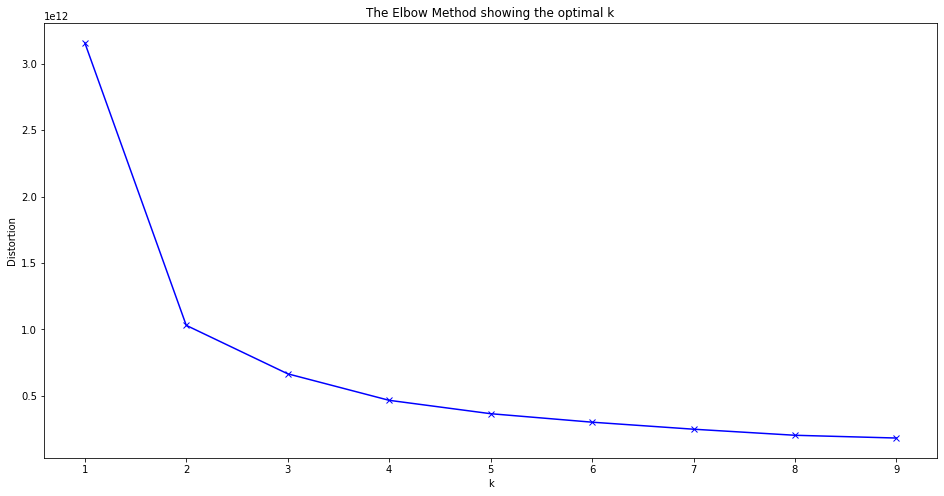

In [229]:
plt.close(fig)
fig=plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/elbow_method.jpg", bbox_inches ='tight')
plt.show()

In [38]:
plt.figure(figsize=(16,8))
plt.plot(K, silueta, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'silueta' is not defined

In [230]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_cluster)

KMeans(n_clusters=3)

In [41]:
#silhouette_score(df_cluster,kmeanModel.labels_, metric = 'euclidean')

In [231]:
kmeanModel.labels_

array([0, 0, 2, ..., 0, 2, 2])

In [232]:
df2_encoder["cluster"] = kmeanModel.labels_


In [413]:
for i in range(0,len(columnas)):
    fig,axs = plt.subplots(figsize=(17.5,10))
    sns.barplot(ax = axs,
                data =df2_encoder, 
                x = columnas[i], 
                y = columnas[i],
                hue = df2_encoder["cluster"],
                estimator=lambda x: len(x) / len(df2) * 100)
    plt.tight_layout()
    axs.set_ylabel("Porcentaje", fontsize = "xx-large")
    axs.set_xlabel(columnas[i], fontsize = "xx-large")
    fig.suptitle(columnas[i], fontsize = "xx-large")
    fig.legend(fontsize = "xx-large")
    fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+"_hue=cluster.jpg", bbox_inches ='tight')
    plt.close(fig)

In [233]:
# No funcionó el clúster
df2_encoder.drop("cluster",axis = 1, inplace = True)

#### Clúster jerárquico

In [ ]:
# Se trabajaraa en Rstudio 
DataFrame.to_csv()

### Empleo de algoritmos para clasificar y predecir

In [297]:
muchos_nas

['areag', 'ocudif', 'escodif', 'pnadif', 'predif', 'ciuodif']


### Predicción area_geográfica

In [324]:
#df2_regresion = df2.drop(['ciuodif','pnadif','predif', 'ocudif', 'escodif','mnadif' ], axis = 1)
target = "areag"
excepcion = 'ciuodif'
lista=creacion_listas(target,excepcion,muchos_nas)
lista2 = lista.copy()
print(lista2)
df2_regresion = df2_encoder[lista2]
df2_regresion.dropna(axis = 0,inplace = True, how = 'any', subset = [excepcion])
df2_regresion.isna().sum()
mask =df2_regresion[target].isna()
Columnas_regresion=df2_regresion.columns.tolist()
Columnas_x = Columnas_regresion.copy()
Columnas_x.remove(target)
df3 = df2_regresion[mask]
df4 =  df2_regresion.drop(df2_regresion[mask].index)

['depreg', 'mupreg', 'depocu', 'mupocu', 'mredif', 'añoreg', 'añoocu', 'ciuodif', 'asist', 'ocur', 'areag']


In [325]:
train,test=train_test_split(df4, test_size = 0.2, random_state = 666)

In [326]:
try:
    lista2.remove(target)
except:
    print("La variable: "+target+" ya fue removida")

## Random forest 

In [327]:
#rmf = RandomForestRegressor (n_estimators = 200, 
                             #random_state = 666,
                             #)


IndentationError: unexpected indent (<ipython-input-327-619ced7a3310>, line 2)

In [328]:
#scores = cross_val_score(rmf,
                         #train[lista2],
                         #train[target],
                         #cv=10)

#print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

In [329]:
#rmf.fit(train[lista2], train[target])
#y=rmf.predict(test[lista2])

In [330]:
#print("score para el set de entrenamiento")
#print(rmf.score(train[lista2], train[target]))
#print("")
#print("score para el set de prueba")
#rmf.score(test[lista2], test[target])

In [331]:
#print("no normalizado")
#print(pd.crosstab(test[target],np.round(y),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
#print("")
#print("***************")
#print("")
#print("normalizado")
#print(pd.crosstab(test[target],np.round(y), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

## Regresión logistica

In [332]:
modelo_logistico = LogisticRegression( fit_intercept = True,
                                      solver = 'lbfgs',
                                      random_state = 666, 
                                      warm_start = True, 
                                      penalty = 'l2' ,
                                     n_jobs = -1)

In [333]:
warnings.filterwarnings("ignore")
scores = cross_val_score(modelo_logistico,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.75 de presición con desviación estándar de 0.03


In [334]:
modelo_logistico.fit(train[lista2], train[target])

LogisticRegression(n_jobs=-1, random_state=666, warm_start=True)

In [335]:
print("score para el set de entrenamiento")
print(modelo_logistico.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(modelo_logistico.score(test[lista2], test[target]))

score para el set de entrenamiento
0.7814869184971166

score para el set de prueba
0.7822254065167279


In [336]:
y_logistic=modelo_logistico.predict(test[lista2])

In [337]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_logistic),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_logistic), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

no normalizado
Prediccion    1.0    2.0  9.0    All
Verdadero                           
1.0         28024   6144  265  34433
2.0          6228  22188   70  28486
9.0           322    953   10   1285
All         34574  29285  345  64204

***************

normalizado
Prediccion       1.0       2.0       9.0
Verdadero                               
1.0         0.436484  0.095695  0.004127
2.0         0.097003  0.345586  0.001090
9.0         0.005015  0.014843  0.000156


## Árbol de clasificasión 

In [338]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             random_state = 666)

In [339]:
scores = cross_val_score(tree_model,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.85 de presición con desviación estándar de 0.00


In [340]:
tree_model.fit(train[lista2], train[target])
y_tree=tree_model.predict(test[lista2])

In [341]:
print("score para el set de entrenamiento")
print(tree_model.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(tree_model.score(test[lista2], test[target]))

score para el set de entrenamiento
0.8739978116372613

score para el set de prueba
0.84923057753411


In [342]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_tree),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_tree), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion    1.0    2.0  9.0    All
Verdadero                           
1.0         29023   5330   80  34433
2.0          3139  25179  168  28486
9.0           234    729  322   1285
All         32396  31238  570  64204

***************

normalizado
Prediccion       1.0       2.0       9.0       All
Verdadero                                         
1.0         0.452043  0.083017  0.001246  0.536306
2.0         0.048891  0.392172  0.002617  0.443680
9.0         0.003645  0.011354  0.005015  0.020014
All         0.504579  0.486543  0.008878  1.000000


#### Naive-Bayes para clasificación

In [343]:
nb=CategoricalNB()

In [344]:
scores = cross_val_score(nb,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.83 de presición con desviación estándar de 0.00


In [345]:
nb.fit(train[lista2], train[target])
y_nb=nb.predict(test[lista2])

In [346]:
print("score para el set de entrenamiento")
print(nb.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(nb.score(test[lista2], test[target]))

score para el set de entrenamiento
0.8345761312706133

score para el set de prueba
0.83264282599215


In [347]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_nb),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_nb), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion    1.0    2.0   9.0    All
Verdadero                            
1.0         28481   5623   329  34433
2.0          3104  24637   745  28486
9.0           217    727   341   1285
All         31802  30987  1415  64204

***************

normalizado
Prediccion       1.0       2.0       9.0       All
Verdadero                                         
1.0         0.443602  0.087580  0.005124  0.536306
2.0         0.048346  0.383730  0.011604  0.443680
9.0         0.003380  0.011323  0.005311  0.020014
All         0.495327  0.482633  0.022039  1.000000


## Escolaridad

In [348]:
try: 
    del df3,df4
except:
    print("Los data frames ya fueron reiniciados")

In [349]:
target = "escodif"
diccionario[target]

['añoreg', 'añoocu', 'nacdif', 'puedif', 'ocur', 'escodif']

In [350]:
target = "escodif"
excepcion = 'puedif'
lista=creacion_listas(target,excepcion,muchos_nas)
lista2 = lista.copy()
print(lista2)

df2_regresion = df2_encoder[lista2]
try:
    df2_regresion.dropna(axis = 0,inplace = True, how = 'any', subset = [excepcion])
except:
    print("")
df2_regresion.isna().sum()

mask =df2_regresion[target].isna()

Columnas_regresion=df2_regresion.columns.tolist()
Columnas_x = Columnas_regresion.copy()
Columnas_x.remove(target)

df3 = df2_regresion[mask]
df4 =  df2_regresion.drop(df2_regresion[mask].index)

['añoreg', 'añoocu', 'nacdif', 'puedif', 'ocur', 'escodif']


In [351]:
train,test=train_test_split(df4, test_size = 0.2, random_state = 666)
try:
    lista2.remove(target)
except:
    print("La variable: "+target+" ya fue removida")

## Random forest 

In [352]:
#rmf = RandomForestRegressor (n_estimators = 200, 
                            # random_state = 666,
                            # )

In [353]:
#scores = cross_val_score(rmf,
#                         train[lista2],
 #                        train[target],
  #                       cv=10)
#
#print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

In [354]:
#rmf.fit(train[lista2], train[target])
#y=rmf.predict(test[lista2])

In [355]:
#print("score para el set de entrenamiento")
#print(rmf.score(train[lista2], train[target]))
#print("")
#print("score para el set de prueba")
#rmf.score(test[lista2], test[target])

In [356]:
#y=rmf.predict(test[lista2])
#print("no normalizado")
#print(pd.crosstab(test[target],np.round(y),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
#print("")
#print("***************")
#print("")
#print("normalizado")
#print(pd.crosstab(test[target],np.round(y), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

## Regresión lógistica

In [357]:
modelo_logistico = LogisticRegression( fit_intercept = True,
                                      solver = 'lbfgs',
                                      random_state = 666, 
                                      warm_start = True, 
                                      penalty = 'l2' ,
                                     n_jobs = -1)

In [358]:
warnings.filterwarnings("ignore")
scores = cross_val_score(modelo_logistico,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.55 de presición con desviación estándar de 0.00


In [359]:
modelo_logistico.fit(train[lista2], train[target])
y_logistic=modelo_logistico.predict(test[lista2])

In [360]:
print("score para el set de entrenamiento")
print(modelo_logistico.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(modelo_logistico.score(test[lista2], test[target]))

score para el set de entrenamiento
0.5492777105043235

score para el set de prueba
0.5537848605577689


In [361]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_logistic),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_logistic), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

no normalizado
Prediccion    1.0  2.0  4.0    All
Verdadero                         
1.0         40494  142    0  40636
2.0         17077   93    0  17170
3.0          2990   23    0   3013
4.0          4153   11    1   4165
5.0           955    4    0    959
6.0            21    0    0     21
9.0          7319    9    0   7328
All         73009  282    1  73292

***************

normalizado
Prediccion       1.0       2.0       4.0
Verdadero                               
1.0         0.552502  0.001937  0.000000
2.0         0.233000  0.001269  0.000000
3.0         0.040796  0.000314  0.000000
4.0         0.056664  0.000150  0.000014
5.0         0.013030  0.000055  0.000000
6.0         0.000287  0.000000  0.000000
9.0         0.099861  0.000123  0.000000


## Árbol de clasificasión 

In [362]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             random_state = 666)

In [363]:
scores = cross_val_score(tree_model,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.58 de presición con desviación estándar de 0.00


In [364]:
tree_model.fit(train[lista2], train[target])
y_tree=tree_model.predict(test[lista2])

In [365]:
print("score para el set de entrenamiento")
print(tree_model.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(tree_model.score(test[lista2], test[target]))

score para el set de entrenamiento
0.5773097061381816

score para el set de prueba
0.5775391584347541


In [366]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_tree),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_tree), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion    1.0    2.0  3.0  4.0  5.0  9.0    All
Verdadero                                          
1.0         37119   3301    1    5    1  209  40636
2.0         12156   4904    1    7    5   97  17170
3.0          1479   1489    1    5    5   34   3013
4.0          2144   1925    1   19   20   56   4165
5.0           516    401    1   10   13   18    959
6.0            12      8    0    0    1    0     21
9.0          6530    503    1   10   11  273   7328
All         59956  12531    6   56   56  687  73292

***************

normalizado
Prediccion       1.0       2.0       3.0       4.0       5.0       9.0  \
Verdadero                                                                
1.0         0.506454  0.045039  0.000014  0.000068  0.000014  0.002852   
2.0         0.165857  0.066910  0.000014  0.000096  0.000068  0.001323   
3.0         0.020180  0.020316  0.000014  0.000068  0.000068  0.000464   
4.0         0.029253  0.026265  0.000014  0.000259  0.000273  0.0

## Naive Bayes

In [367]:
nb=CategoricalNB()

In [368]:
scores = cross_val_score(nb,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.54 de presición con desviación estándar de 0.00


In [369]:
nb.fit(train[lista2], train[target])
y_nb=nb.predict(test[lista2])

In [370]:
print("score para el set de entrenamiento")
print(nb.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(nb.score(test[lista2], test[target]))

score para el set de entrenamiento
0.5380417171217574

score para el set de prueba
0.5381897069257218


In [371]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_nb),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_nb), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion    1.0    2.0  3.0  4.0  5.0    9.0    All
Verdadero                                            
1.0         31544   4528    1    7    1   4555  40636
2.0          9583   5550    0   11    1   2025  17170
3.0          1239   1327    0    7    0    440   3013
4.0          1650   1891    1   21    2    600   4165
5.0           365    444    1   10    6    133    959
6.0            11     10    0    0    0      0     21
9.0          4687    305    2    6    4   2324   7328
All         49079  14055    5   62   14  10077  73292

***************

normalizado
Prediccion       1.0       2.0       3.0       4.0       5.0       9.0  \
Verdadero                                                                
1.0         0.430388  0.061780  0.000014  0.000096  0.000014  0.062149   
2.0         0.130751  0.075724  0.000000  0.000150  0.000014  0.027629   
3.0         0.016905  0.018106  0.000000  0.000096  0.000000  0.006003   
4.0         0.022513  0.025801  0.000014  0.0

## Pueblo del difunto

In [372]:
try: 
    del df3,df4
except:
    print("Los data frames ya fueron reiniciados")

In [373]:
target = "puedif"
diccionario["puedif"]

['depreg',
 'mupreg',
 'depocu',
 'mupocu',
 'mredif',
 'dredif',
 'mnadif',
 'dnadif',
 'añoreg',
 'añoocu',
 'puedif',
 'puedif',
 'puedif',
 'puedif',
 'puedif',
 'puedif']

In [374]:

excepcion = ""
lista=creacion_listas(target,excepcion,muchos_nas)
lista2 = list(set(lista.copy()))
print(lista2)

df2_regresion = df2_encoder[lista2]
try:
    df2_regresion.dropna(axis = 0,inplace = True, how = 'any', subset = [excepcion])
except:
    print("")
df2_regresion.isna().sum()

mask =df2_regresion[target].isna()

Columnas_regresion=df2_regresion.columns.tolist()
Columnas_x = Columnas_regresion.copy()
Columnas_x.remove(target)

df3 = df2_regresion[mask]
df4 =  df2_regresion.drop(df2_regresion[mask].index)

['dnadif', 'puedif', 'añoocu', 'mupreg', 'depreg', 'depocu', 'mnadif', 'añoreg', 'mupocu', 'dredif', 'mredif']



In [375]:
train,test=train_test_split(df4, test_size = 0.2, random_state = 666)

In [376]:

try:
    lista2.remove(target)
except:
    print("La variable: "+target+" ya fue removida")

## Random forest 

In [377]:
#rmf = RandomForestRegressor (n_estimators = 200, 
                            # random_state = 666,
                            # )

In [378]:
#scores = cross_val_score(rmf,
                         #train[lista2],
                         #train[target],
                         #cv=10)

#print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

In [379]:
#rmf.fit(train[lista2], train[target])
#y=rmf.predict(test[lista2])

In [380]:
#print("score para el set de entrenamiento")
#print(rmf.score(train[lista2], train[target]))
#print("")
#print("score para el set de prueba")
#rmf.score(test[lista2], test[target])

In [381]:
#y=rmf.predict(test[lista2])
#print("no normalizado")
#print(pd.crosstab(test[target],np.round(y),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
#print("")
#print("***************")
#print("")
#print("normalizado")
#print(pd.crosstab(test[target],np.round(y), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

## Regresión lógistica

In [382]:
modelo_logistico = LogisticRegression( fit_intercept = True,
                                      solver = 'lbfgs',
                                      random_state = 666, 
                                      warm_start = True, 
                                      penalty = 'l2' ,
                                     n_jobs = -1)

In [383]:
warnings.filterwarnings("ignore")
scores = cross_val_score(modelo_logistico,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.46 de presición con desviación estándar de 0.00


In [384]:
modelo_logistico.fit(train[lista2], train[target])
y_logistic=modelo_logistico.predict(test[lista2])

In [385]:
print("score para el set de entrenamiento")
print(modelo_logistico.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(modelo_logistico.score(test[lista2], test[target]))

score para el set de entrenamiento
0.46041875

score para el set de prueba
0.463225


In [386]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_logistic),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_logistic), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion      1   2      4  5     9    All
Verdadero                                   
1            9811   3  11806  0   300  21920
2            5535   7   3643  1   445   9631
3              11   0      6  0     1     18
4            6108  50  20628  0   582  27368
5              81   1    456  0    37    575
9            5387  12   8477  0  6612  20488
All         26933  73  45016  1  7977  80000

***************

normalizado
Prediccion         1         2         4         5         9       All
Verdadero                                                             
1           0.122637  0.000037  0.147575  0.000000  0.003750  0.274000
2           0.069187  0.000087  0.045538  0.000013  0.005562  0.120387
3           0.000138  0.000000  0.000075  0.000000  0.000013  0.000225
4           0.076350  0.000625  0.257850  0.000000  0.007275  0.342100
5           0.001012  0.000013  0.005700  0.000000  0.000463  0.007188
9           0.067337  0.000150  0.105963  0.000000  0

## Árbol de desición

In [387]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             random_state = 666)

In [388]:
scores = cross_val_score(tree_model,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.78 de presición con desviación estándar de 0.00


In [389]:
tree_model.fit(train[lista2], train[target])
y_tree=tree_model.predict(test[lista2])

In [390]:
print("score para el set de entrenamiento")
print(tree_model.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(tree_model.score(test[lista2], test[target]))

score para el set de entrenamiento
0.806990625

score para el set de prueba
0.781575


In [391]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_tree),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_tree), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion      1     2      4   5      9    All
Verdadero                                       
1           18789   453   1402   6   1270  21920
2             501  6931     10   0   2189   9631
3               0     0     18   0      0     18
4            1946     0  24901  19    502  27368
5             186     0    304  37     48    575
9            2820  2017   3767  16  11868  20488
All         24242  9401  30402  78  15877  80000

***************

normalizado
Prediccion         1         2         4         5         9       All
Verdadero                                                             
1           0.234863  0.005662  0.017525  0.000075  0.015875  0.274000
2           0.006262  0.086638  0.000125  0.000000  0.027363  0.120387
3           0.000000  0.000000  0.000225  0.000000  0.000000  0.000225
4           0.024325  0.000000  0.311262  0.000237  0.006275  0.342100
5           0.002325  0.000000  0.003800  0.000463  0.000600  0.007188
9           0.035

## Naive-Bayes

In [392]:
nb=CategoricalNB()

In [393]:
scores = cross_val_score(nb,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

nan de presición con desviación estándar de nan


In [394]:
nb.fit(train[lista2], train[target])
y_nb=nb.predict(test[lista2])

In [395]:
print("score para el set de entrenamiento")
print(nb.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(nb.score(test[lista2], test[target]))

score para el set de entrenamiento
0.71299375

score para el set de prueba
0.7132625


In [396]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_nb),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_nb), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion      1      2      4    5      9    All
Verdadero                                         
1           16674   1954   1131  284   1877  21920
2            1883   5946     19    1   1782   9631
3               0      0     17    0      1     18
4            2048      0  23871  344   1105  27368
5             145      0    268  100     62    575
9            3206   3090   3539  183  10470  20488
All         23956  10990  28845  912  15297  80000

***************

normalizado
Prediccion         1         2         4         5         9       All
Verdadero                                                             
1           0.208425  0.024425  0.014138  0.003550  0.023463  0.274000
2           0.023537  0.074325  0.000237  0.000013  0.022275  0.120387
3           0.000000  0.000000  0.000212  0.000000  0.000013  0.000225
4           0.025600  0.000000  0.298388  0.004300  0.013813  0.342100
5           0.001813  0.000000  0.003350  0.001250  0.000775  0.007188

## Sitio de ocurrencia

In [397]:
try: 
    del df3,df4
except:
    print("Los data frames ya fueron reiniciados")

In [398]:
target = "ocur"
diccionario[target]

['mupreg',
 'mupocu',
 'añoreg',
 'añoocu',
 'nacdif',
 'caudef',
 'asist',
 'areag',
 'ocur']

In [399]:

excepcion = "areag"
lista=creacion_listas(target,excepcion,muchos_nas)
lista2 = list(set(lista.copy()))
print(lista2)

df2_regresion = df2_encoder[lista2]
try:
    df2_regresion.dropna(axis = 0,inplace = True, how = 'any', subset = [excepcion])
except:
    print("")
df2_regresion.isna().sum()

mask =df2_regresion[target].isna()

Columnas_regresion=df2_regresion.columns.tolist()
Columnas_x = Columnas_regresion.copy()
Columnas_x.remove(target)

df3 = df2_regresion[mask]
df4 =  df2_regresion.drop(df2_regresion[mask].index)

['asist', 'areag', 'ocur', 'añoocu', 'mupreg', 'caudef', 'nacdif', 'añoreg', 'mupocu']


In [400]:
train,test=train_test_split(df4, test_size = 0.2, random_state = 666)

In [401]:
try:
    lista2.remove(target)
except:
    print("La variable: "+target+" ya fue removida")

## Random Forest

In [402]:
#rmf = RandomForestRegressor (n_estimators = 200, 
                             #random_state = 666,
                            # )

In [403]:
#scores = cross_val_score(rmf,
                        # train[lista2],
                         #train[target],
                         #cv=10)

#print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

In [404]:
#rmf.fit(train[lista2], train[target])
#y=rmf.predict(test[lista2])

In [405]:
#print("score para el set de entrenamiento")
#print(rmf.score(train[lista2], train[target]))
#print("")
#print("score para el set de prueba")
#rmf.score(test[lista2], test[target])

In [406]:
#y=rmf.predict(test[lista2])
#print("no normalizado")
#print(pd.crosstab(test[target],np.round(y),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
#print("")
#print("***************")
#print("")
#print("normalizado")
#print(pd.crosstab(test[target],np.round(y), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"]))

## Regresión lógistica 

In [407]:
modelo_logistico = LogisticRegression( fit_intercept = True,
                                      solver = 'lbfgs',
                                      random_state = 666, 
                                      warm_start = True, 
                                      penalty = 'l2' ,
                                     n_jobs = -1)

In [408]:
warnings.filterwarnings("ignore")
scores = cross_val_score(modelo_logistico,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.60 de presición con desviación estándar de 0.01


In [409]:
modelo_logistico.fit(train[lista2], train[target])
y_logistic=modelo_logistico.predict(test[lista2])

In [410]:
print("score para el set de entrenamiento")
print(modelo_logistico.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(modelo_logistico.score(test[lista2], test[target]))

score para el set de entrenamiento
0.5922091171397087

score para el set de prueba
0.5945891221730734


In [411]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_logistic),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_logistic), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion     1   2    3     4      6    All
Verdadero                                    
1           2591  15  473   720   9673  13472
2            149   3    4    26   1446   1628
3             32   0  280   294    149    755
4            524   2  220  1960   4285   6991
5           1411   0    0     1   1079   2491
6           1535  16    0     3  33341  34895
7              8   0    0     0      5     13
8            439   0    0     1    622   1062
9            636   1   11    24   2225   2897
All         7325  37  988  3029  52825  64204

***************

normalizado
Prediccion         1         2         3         4         6       All
Verdadero                                                             
1           0.040356  0.000234  0.007367  0.011214  0.150660  0.209831
2           0.002321  0.000047  0.000062  0.000405  0.022522  0.025357
3           0.000498  0.000000  0.004361  0.004579  0.002321  0.011759
4           0.008161  0.000031  0.003427  0.0305

## Árboles de decisión 

In [412]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             random_state = 666)

In [413]:
scores = cross_val_score(tree_model,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.84 de presición con desviación estándar de 0.00


In [414]:
tree_model.fit(train[lista2], train[target])
y_tree=tree_model.predict(test[lista2])

In [415]:
print("score para el set de entrenamiento")
print(tree_model.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(tree_model.score(test[lista2], test[target]))

score para el set de entrenamiento
0.8633869780735399

score para el set de prueba
0.8404928041866551


In [416]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_tree),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_tree), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado
Prediccion      1    2    3     4     5      6  7    8     9    All
Verdadero                                                          
1           11510  135   29   589    22   1155  0   13    19  13472
2             775  111   10   129     9    580  0    6     8   1628
3              71    8  527    86     7     40  0    1    15    755
4            1701   43  118  4432    10    663  0    0    24   6991
5              57    3    1     3  1995    151  0   97   184   2491
6            1272  116   14   164   113  32805  1   34   376  34895
7               1    0    0     0     4      4  0    3     1     13
8              54    4    0     4   160    220  0  469   151   1062
9              56    3   25     9   201    389  0  100  2114   2897
All         15497  423  724  5416  2521  36007  1  723  2892  64204

***************

normalizado
Prediccion         1         2         3         4         5         6  \
Verdadero                                                        

## Naive-Bayes

In [423]:
nb=CategoricalNB()

In [424]:
scores = cross_val_score(nb,
                         train[lista2], 
                         train[target], 
                         cv=10)

print("%0.2f de presición con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

nan de presición con desviación estándar de nan


In [425]:
nb.fit(train[lista2], train[target])
y_nb=nb.predict(test[lista2])

IndexError: index 2729 is out of bounds for axis 1 with size 2729

In [427]:
train.iloc[2729,:]

asist        5.0
areag        2.0
ocur         6.0
añoocu      12.0
mupreg    1413.0
caudef      20.0
nacdif     320.0
añoreg      12.0
mupocu    1413.0
Name: 250837, dtype: float64

In [428]:
train.iloc[2728,:]

asist        1.0
areag        1.0
ocur         1.0
añoocu       9.0
mupreg    1703.0
caudef    1049.0
nacdif       0.0
añoreg       9.0
mupocu    1703.0
Name: 59694, dtype: float64

In [421]:
print("score para el set de entrenamiento")
print(nb.score(train[lista2], train[target]))
print("")
print("score para el set de prueba")
print(nb.score(test[lista2], test[target]))

score para el set de entrenamiento
0.7881493538099706

score para el set de prueba


IndexError: index 2729 is out of bounds for axis 1 with size 2729

In [422]:
print("no normalizado")
print(pd.crosstab(test[target],np.round(y_nb),rownames = ["Verdadero"], colnames = ["Prediccion"], margins = True))
print("")
print("***************")
print("")
print("normalizado")
print(pd.crosstab(test[target],np.round(y_nb), normalize = True,rownames = ["Verdadero"], colnames = ["Prediccion"],margins = True))

no normalizado


ValueError: could not broadcast input array from shape (80000) into shape (64204)

## Exploración del municipio de nacimiento y edades